### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

#### 🚨 데이터 탐색

In [2]:
import pandas as pd

path = "./datasets/customer_invoice_data.csv"
ci_df = pd.read_csv(path, sep=",")

display(ci_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
# 컬럼명 변경하기
ci_df.columns = ['OrderID', 'ProductCode', 'Product', 'ProductCount', 'Date', 'Price', 'CustomerID', 'City']
ci_df

,OrderID,ProductCode,Product,ProductCount,Date,Price,CustomerID,City
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   OrderID       541909 non-null  object 
 1   ProductCode   541909 non-null  object 
 2   Product       540455 non-null  object 
 3   ProductCount  541909 non-null  int64  
 4   Date          541909 non-null  object 
 5   Price         541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   City          541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 🚨 중복행 검사

In [5]:
ci_df.duplicated().sum()

5268

In [6]:
# CustomerID 중복 검색
duplicates = ci_df.duplicated(subset=['CustomerID'], keep=False)
print(duplicates.any())

# InvoiceNo 중복 검색
duplicates = ci_df.duplicated(subset=['OrderID'], keep=False)
print(duplicates.any())

True
True


In [7]:
# CustomerID가 같은 OrderID들을 하나로 묶고 각 CustomerID별 주문 건수 계산
order_count_per_customer = ci_df.groupby('CustomerID')['OrderID'].nunique()
print(order_count_per_customer)

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: OrderID, Length: 4372, dtype: int64


#### 🚨 결측치 검사

In [8]:
ci_df.isnull().sum()

OrderID              0
ProductCode          0
Product           1454
ProductCount         0
Date                 0
Price                0
CustomerID      135080
City                 0
dtype: int64

In [9]:
# CustomerID가 비어있는 데이터를 전부 제외하기
ci_df = ci_df.dropna(subset=['CustomerID'])
# 재검사
ci_df.isnull().sum()

OrderID         0
ProductCode     0
Product         0
ProductCount    0
Date            0
Price           0
CustomerID      0
City            0
dtype: int64

In [10]:
ci_df

,OrderID,ProductCode,Product,ProductCount,Date,Price,CustomerID,City
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### 🚨 데이터 전처리
- 각 데이터들의 빈값과 대체하거나 삭제하기
- ProductCount 와 Price로 TotalPrice 구하기
- Date 형식 바꿔주기
- OrderDate(구매날짜) 계산해서 컬럼 추가하기
- Product, Price 불필요 컬럼 삭제하기

In [11]:
# 불필요한 컬럼명 삭제
ci_df = ci_df.drop(columns=['Product'])
ci_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
# ProductCount 데이터 확인하기
productcount_zero = ci_df[ci_df['ProductCount'] <= 0]
display(productcount_zero)

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City
141,C536379,D,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
# ProductCount가 0 이하인 데이터 삭제
ci_df = ci_df.drop(ci_df[ci_df['ProductCount'] <= 0].index)

# 삭제 후 데이터 확인
ci_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [14]:
# Price 데이터 확인하기
price_zero = ci_df[ci_df['Price'] <= 0]
display(price_zero)

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City
9302,537197,22841,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [15]:
# 제품 개수와 단가를 합산해 총 구매 금액 구하기
ci_df['TotalPrice'] = ci_df['ProductCount'] * ci_df['Price']
ci_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [16]:
# CustomerID를 기준으로 주문 횟수를 계산하여 출력
order_counts = ci_df.groupby('CustomerID').value_counts()
print(order_counts)

CustomerID  OrderID  ProductCode  ProductCount  Date             Price  City            TotalPrice
12346.0     541431   23166        74215         1/18/2011 10:01  1.04   United Kingdom  77183.6       1
12347.0     542237   85116        6             1/26/2011 14:30  2.10   Iceland         12.6          1
            549222   22371        4             4/7/2011 10:43   4.25   Iceland         17.0          1
                     22196        12            4/7/2011 10:43   0.85   Iceland         10.2          1
                     22195        12            4/7/2011 10:43   1.65   Iceland         19.8          1
                                                                                                     ..
18287.0     554065   22064        12            5/22/2011 10:39  1.65   United Kingdom  19.8          1
                     21556        12            5/22/2011 10:39  2.55   United Kingdom  30.6          1
                     21382        18            5/22/2011 10:39  2.95

In [17]:
ci_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [18]:
# 오늘(2011-12-09)로부터 지난 구매 날짜 구하기
ci_df['OrderDate'] = pd.to_datetime(ci_df['Date']).apply(lambda x: (pd.to_datetime('2011-12-09') - x).days)
display(ci_df)

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice,OrderDate
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,372
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,372
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,10.20,-1
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12.60,-1
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,16.60,-1
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,16.60,-1


In [19]:
ci_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice,OrderDate
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,372
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,372
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,10.20,-1
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12.60,-1
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,16.60,-1
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,16.60,-1


In [20]:
# CustomerID를 기준으로 주문 횟수를 계산하여 출력
order_counts = ci_df.groupby('CustomerID').value_counts()
print(order_counts)

CustomerID  OrderID  ProductCode  ProductCount  Date             Price  City            TotalPrice  OrderDate
12346.0     541431   23166        74215         1/18/2011 10:01  1.04   United Kingdom  77183.6     324          1
12347.0     542237   85116        6             1/26/2011 14:30  2.10   Iceland         12.6        316          1
            549222   22371        4             4/7/2011 10:43   4.25   Iceland         17.0        245          1
                     22196        12            4/7/2011 10:43   0.85   Iceland         10.2        245          1
                     22195        12            4/7/2011 10:43   1.65   Iceland         19.8        245          1
                                                                                                                ..
18287.0     554065   22064        12            5/22/2011 10:39  1.65   United Kingdom  19.8        200          1
                     21556        12            5/22/2011 10:39  2.55   United Kingdo

In [21]:
# # InvoiceNo를 기준으로 주문 횟수를 계산하여 출력
# order_counts = ci_df['OrderID'].value_counts()
# print(order_counts)

In [22]:
# Recency
rfm_r = ci_df.groupby('CustomerID')['OrderDate'].min().reset_index()
rfm_r.columns = ['CustomerID', 'Recency']

# Frequency
rfm_f = ci_df['CustomerID'].value_counts().reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']

# Monetary
rfm_m = ci_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
rfm_m.columns = ['CustomerID', 'Monetary']

rfm = pd.merge(rfm_r, rfm_f, on='CustomerID')
rfm = pd.merge(rfm, rfm_m, on='CustomerID')

rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,324,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,17,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4334,18280.0,276,10,180.60
4335,18281.0,179,7,80.82
4336,18282.0,6,12,178.05
4337,18283.0,2,756,2094.88


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [24]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,0.128686,0.000000,0.275453
1,12347.0,0.994638,0.023069,0.015382
2,12348.0,0.798928,0.003824,0.006414
3,12349.0,0.951743,0.009177,0.006272
4,12350.0,0.168901,0.002039,0.001193
...,...,...,...,...
4334,18280.0,0.257373,0.001147,0.000645
4335,18281.0,0.517426,0.000765,0.000288
4336,18282.0,0.981233,0.001402,0.000635
4337,18283.0,0.991957,0.096227,0.007476


In [25]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,TotalScore
0,12346.0,0.128686,0.000000,0.275453,0.404139
1,12347.0,0.994638,0.023069,0.015382,1.033089
2,12348.0,0.798928,0.003824,0.006414,0.809165
3,12349.0,0.951743,0.009177,0.006272,0.967192
4,12350.0,0.168901,0.002039,0.001193,0.172133
...,...,...,...,...,...
4334,18280.0,0.257373,0.001147,0.000645,0.259164
4335,18281.0,0.517426,0.000765,0.000288,0.518479
4336,18282.0,0.981233,0.001402,0.000635,0.983271
4337,18283.0,0.991957,0.096227,0.007476,1.095661


In [26]:
ci_rfm_df = pd.merge(ci_df, rfm, on='CustomerID')
ci_rfm_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice,OrderDate,Recency,Frequency,Monetary,TotalScore
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,372,0.002681,0.037726,0.019240,0.059647
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.002681,0.037726,0.019240,0.059647
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,372,0.002681,0.037726,0.019240,0.059647
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.002681,0.037726,0.019240,0.059647
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.002681,0.037726,0.019240,0.059647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581578,22993,12,12/9/2011 12:16,1.25,12713.0,Germany,15.00,-1,1.000000,0.004716,0.003028,1.007744
397920,581578,22907,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.000000,0.004716,0.003028,1.007744
397921,581578,22908,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.000000,0.004716,0.003028,1.007744
397922,581578,23215,12,12/9/2011 12:16,2.08,12713.0,Germany,24.96,-1,1.000000,0.004716,0.003028,1.007744


In [27]:
# 불필요한 컬럼명 삭제
ci_rfm_df = ci_rfm_df.drop(columns=['Recency', 'Frequency', 'Monetary'])
ci_rfm_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice,OrderDate,TotalScore
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,372,0.059647
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,372,0.059647
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647
...,...,...,...,...,...,...,...,...,...,...
397919,581578,22993,12,12/9/2011 12:16,1.25,12713.0,Germany,15.00,-1,1.007744
397920,581578,22907,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.007744
397921,581578,22908,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.007744
397922,581578,23215,12,12/9/2011 12:16,2.08,12713.0,Germany,24.96,-1,1.007744


In [28]:
import numpy as np

l1, l2, l3 = np.percentile(ci_rfm_df['TotalScore'], [20, 70, 90])
print(l1, l2, l3)

0.8701887351284563 1.0420579624726287 1.2382496935613332


In [29]:
def get_level(x):
    if x <= l1:
        return 4
    if x <= l2:
        return 3
    if x <= l3:
        return 2
    return 1

In [30]:
ci_rfm_df['Level'] = ci_rfm_df['TotalScore'].apply(get_level)
ci_rfm_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice,OrderDate,TotalScore,Level
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,372,0.059647,4
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647,4
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,372,0.059647,4
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647,4
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647,4
...,...,...,...,...,...,...,...,...,...,...,...
397919,581578,22993,12,12/9/2011 12:16,1.25,12713.0,Germany,15.00,-1,1.007744,3
397920,581578,22907,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.007744,3
397921,581578,22908,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.007744,3
397922,581578,23215,12,12/9/2011 12:16,2.08,12713.0,Germany,24.96,-1,1.007744,3


In [31]:
ci_rfm_df['Level'] = ci_rfm_df['Level'].replace([4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Vip'])
ci_rfm_df

,OrderID,ProductCode,ProductCount,Date,Price,CustomerID,City,TotalPrice,OrderDate,TotalScore,Level
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,372,0.059647,Bronze
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647,Bronze
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,372,0.059647,Bronze
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647,Bronze
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,372,0.059647,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
397919,581578,22993,12,12/9/2011 12:16,1.25,12713.0,Germany,15.00,-1,1.007744,Silver
397920,581578,22907,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.007744,Silver
397921,581578,22908,12,12/9/2011 12:16,0.85,12713.0,Germany,10.20,-1,1.007744,Silver
397922,581578,23215,12,12/9/2011 12:16,2.08,12713.0,Germany,24.96,-1,1.007744,Silver


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Vip']

print(ci_rfm_df['Level'].value_counts())

Level
Silver    199175
Gold       80607
Bronze     79602
Vip        38540
Name: count, dtype: int64


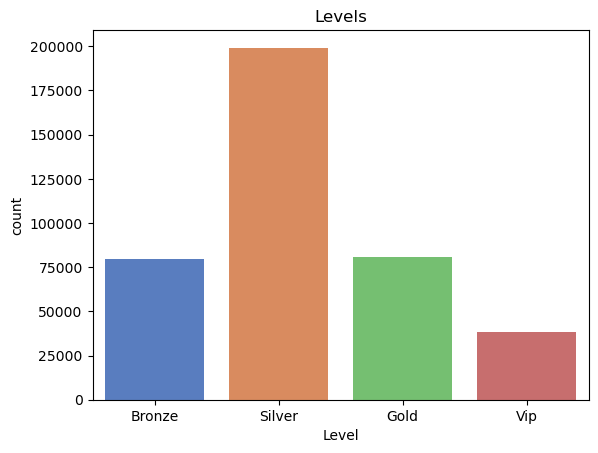

In [33]:
sns.countplot(x='Level', data=ci_rfm_df, palette='muted', order=order)
plt.title('Levels')
plt.show()

In [34]:
unique_cities = ci_df['City'].unique()
print(unique_cities)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [35]:
ci_rfm_df['City'].value_counts()

City
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lit

In [36]:
ci_rfm_df['Continent'].value_counts()

KeyError: 'Continent'

In [ ]:
# 지리적 위치를 기준으로 서유럽, 동유럽, 아시아, 북아메리카, 기타로 묶기
continent_mapping = {
    'Western Europe': ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Norway', 'EIRE', 
                       'Switzerland', 'Spain', 'Portugal', 'Italy', 'Belgium', 'Sweden', 
                       'Finland', 'Austria', 'Channel Islands', 'Denmark', 'Cyprus', 
                       'European Community'],
    'Eastern Europe': ['Poland', 'Lithuania', 'Czech Republic', 'Greece', 'Malta'],
    'Asia': ['Japan', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel', 
             'Saudi Arabia', 'Bahrain'],
    'North America': ['Canada', 'USA'],
    'Other': ['Australia', 'Iceland', 'Unspecified', 'Brazil', 'RSA']
}

def assign_continent(city):
    for continent, city_list in continent_mapping.items():
        if city in city_list:
            return continent
    return 'Unknown'

# 새로운 컬럼 추가
ci_rfm_df['Continent'] = ci_rfm_df['City'].apply(assign_continent)

# 결과 확인
Continent = ci_rfm_df['Continent'].unique()
print(Continent)

In [ ]:
# 서유럽 중 상위 5개 도시 선택
top_cities = ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Norway', 'EIRE', 
              'Switzerland', 'Spain', 'Portugal', 'Italy', 'Belgium', 'Sweden', 
              'Finland', 'Austria', 'Channel Islands', 'Denmark', 'Cyprus', 
              'European Community']

# 주어진 도시들의 TotalScore 계산
top_cities_total_score = ci_rfm_df[ci_rfm_df['City'].isin(top_cities)].groupby('City')['TotalScore'].sum().reset_index()

# TotalScore 내림차순으로 정렬 후 상위 5개 도시 선택
top_5_cities = top_cities_total_score.sort_values(by='TotalScore', ascending=False).head(5)

print(top_5_cities)

In [ ]:
# 서유럽, 동유럽, 아시아, 북아메리카, 기타
fig, axes = plt.subplots(1, 5, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Vip']

sns.countplot(ax=axes[0], x='Continent', hue='Level', data=ci_rfm_df[ci_rfm_df['Continent'] == 'Western Europe'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Continent', hue='Level', data=ci_rfm_df[ci_rfm_df['Continent'] == 'Eastern Europe'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[2], x='Continent', hue='Level', data=ci_rfm_df[ci_rfm_df['Continent'] == 'Asia'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[3], x='Continent', hue='Level', data=ci_rfm_df[ci_rfm_df['Continent'] == 'North America'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[4], x='Continent', hue='Level', data=ci_rfm_df[ci_rfm_df['Continent'] == 'Other'], palette='muted', hue_order=order_columns)

In [ ]:
# 서유럽중 상위 5개 나라
fig, axes = plt.subplots(1, 5, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Vip']

sns.countplot(ax=axes[0], x='City', hue='Level', data=ci_rfm_df[ci_rfm_df['City'] == 'United Kingdom'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='City', hue='Level', data=ci_rfm_df[ci_rfm_df['City'] == 'EIRE'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[2], x='City', hue='Level', data=ci_rfm_df[ci_rfm_df['City'] == 'Germany'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[3], x='City', hue='Level', data=ci_rfm_df[ci_rfm_df['City'] == 'France'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[4], x='City', hue='Level', data=ci_rfm_df[ci_rfm_df['City'] == 'Netherlands'], palette='muted', hue_order=order_columns)

#### 🚨 마케팅 전략
- 대륙별 마케팅
  1. 다른 대륙에 비해 서유럽의 고객 비중이 월등하게 높은 것을 볼 수 있습니다.
     때문에 서유럽 고객의 취향을 고려한 제품을 강화한다면 구매량을 더 높일 수 있는 전략이 될 것같습니다.
  2. 등급의 분포가 균일하지 않은 나라중 VIP가 거의 없는 동유럽, 아시아, 북아메리카는 기존 고객들을 충성고객으로 바꿀 수 있도록
     기존 고객들의 구매를 더 유도할 수 있는 전략을 세워야 합니다.
  3. 기타에 속하는 오스트레일리아, 아이슬란드, 브라질, 남아프리카 공화국 등 소수 나라들은 Bronze,Silver,Vip는 높지만 중간 등급인 Gold가 없습니다.
     이는 구매율이 아주 많거나, 혹은 아주 없어 편차가 큼을 보여줍니다. 때문에 대륙별이 아닌 나라별로 전략적인 마케팅이 필요합니다.

- 상위 5개국 나라별 마케팅
  1. 서유럽중 가장 고객이 많은 나라는 영국입니다. 등급별 분포가 고르고 판매량이 높아
     특정 물품이나 특정 등급에 대한 마케팅을 세우기보다는 전체적인 할인이나 더 다양한 품목을 구매할 수 있도록 유도하는 것이 좋습니다.
  2. 아일랜드는 Vip는 많지만 나머지 등급이 아주 낮습니다.
     때문에 기존 고객이 아닌 신규 고객을 대상으로 하는 마케팅 전략을 세운다면 새로운 고객을 유입하여 매출을 증대시킬 수 있을 것으로 기대됩니다.
  3. 독일과 프랑스는 Bronze,Silver,Gold 등급은 많지만 Vip가 낮습니다.
     이는 전체 고객 대비 충성 고객의 비율이 부족하다는 뜻으로, 기존 고객들의 재구매를 유도하는 마케팅 전략을 세우면 좋을 것 같습니다.
  4. 네덜란드는 전체 고객 대비 Vip의 비율이 아주 높은 나라입니다.
     기존 고객들도 Vip 등급의 안정적인 충성고객들로, 신규 고객을 영입할 수 있는 전략을 세운다면 전체 고객을 더 증가시킬 수 있는 방안이 될 것 같습니다.